# Understanding the Question

* As a data scietist you're tasked with predicting whether an email is spam or not using the Naive Bayes classifier. 
-- Randomly partition each dataset into two parts i.e 80 - 20  sets, 70 - 30 and 60 - 40 sets to compute the accuracy score noting the outcomes of your modeling.
-- Despite being provided with the names, data and documentation datasets, using the data datset to split it into train and test data for your models.

# Importing the libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
zp = pd.read_csv("/content/spambase.data")
name = pd.read_csv("/content/spambase.names", error_bad_lines=False)
doc = pd.read_csv("/content/spambase.DOCUMENTATION", sep=':', error_bad_lines= False)

b'Skipping line 3: expected 1 fields, saw 2\nSkipping line 4: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 32: expected 1 fields, saw 3\n'
b'Skipping line 80: expected 2 fields, saw 6\n'


## Previewing the dataset

In [ ]:
zp.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
name

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,| i.e. 100 * (number of times the WORD appears...
2,"| total number of words in e-mail. A ""word"" i..."
3,| string of alphanumeric characters bounded by...
4,| characters or end-of-string.
...,...
70,char_freq_$: continuous.
71,char_freq_#: continuous.
72,capital_run_length_average: continuous.
73,capital_run_length_longest: continuous.


In [ ]:
doc

,1. Title,SPAM E-mail Database
0,2. Sources,NaN
1,(a) Creators,"Mark Hopkins, Erik Reeber, George Forman, Jaa..."
2,"Hewlett-Packard Labs, 1501 Page Mill R...",NaN
3,(b) Donor,George Forman (gforman at nospam hpl.hp.com) ...
4,(c) Generated,June-July 1999
...,...,...
115,56 1 9989 52.173 194.89 374,NaN
116,57 1 15841 283.29 606.35 214,NaN
117,58 0 1 0.39404 0.4887 124,NaN
118,This file,'spambase.DOCUMENTATION' at the UCI Machine L...


In [ ]:
print("ZP SHAPE:", zp.shape)
print("DOC SHAPE :", doc.shape)
print("NAME SHAPE :", name.shape)

ZP SHAPE: (4600, 58)
DOC SHAPE : (120, 2)
NAME SHAPE : (75, 1)


In [ ]:
zp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

* Used the zp dataset to find if an email is chategorized as spam or not

## Tidying the dataset

In [ ]:
zp.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [ ]:
# Wanted to rename the columns from boolean to string but saw no need
#tp1 = zp.rename(columns = {'0':'Zero', }, inplace = True)

In [ ]:
# Standardization; Replacing column names which are uppercase, with spaces, 
# and whitespace all around.
zp.columns = zp.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')

In [ ]:
# Checking for Outliers
#
from scipy import stats

Q1 = zp.quantile(0.25)
Q3 = zp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0           0.00000
0_64        0.00000
0_64_1      0.42000
0_1         0.00000
0_32        0.38250
0_2         0.00000
0_3         0.00000
0_4         0.00000
0_5         0.00000
0_6         0.16000
0_7         0.00000
0_64_2      0.80000
0_8         0.00000
0_9         0.00000
0_10        0.00000
0_32_1      0.10000
0_11        0.00000
1_29        0.00000
1_93        2.64000
0_12        0.00000
0_96        1.27000
0_13        0.00000
0_14        0.00000
0_15        0.00000
0_16        0.00000
0_17        0.00000
0_18        0.00000
0_19        0.00000
0_20        0.00000
0_21        0.00000
0_22        0.00000
0_23        0.00000
0_24        0.00000
0_25        0.00000
0_26        0.00000
0_27        0.00000
0_28        0.00000
0_29        0.00000
0_30        0.00000
0_31        0.00000
0_32_2      0.00000
0_33        0.00000
0_34        0.00000
0_35        0.00000
0_36        0.11000
0_37        0.00000
0_38        0.00000
0_39        0.00000
0_40        0.00000
0_41        0.18800


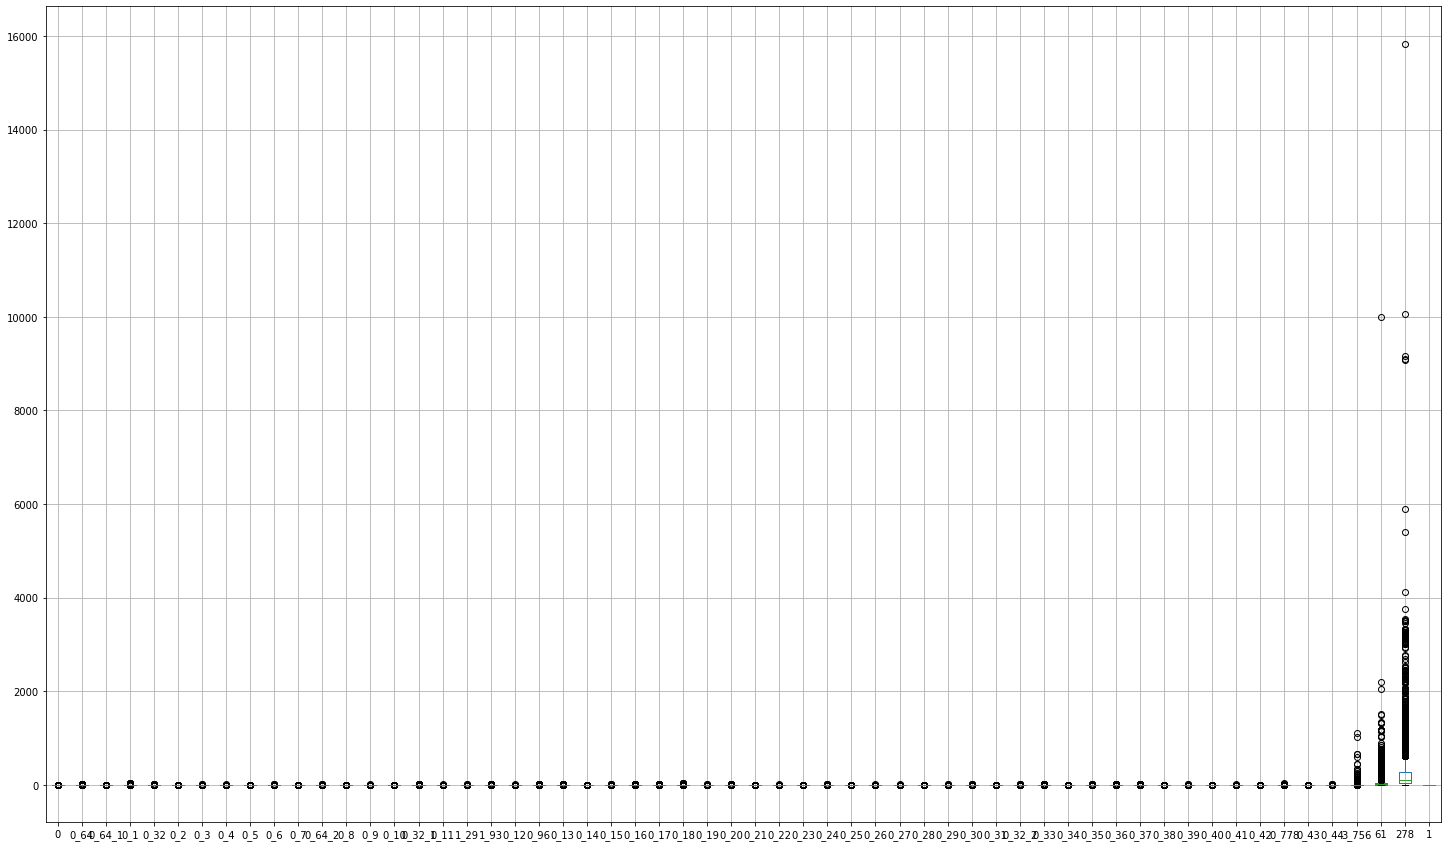

In [ ]:
# Graphically showing the Outliers,
zp.boxplot(figsize=(25,15))
plt.show()

In [ ]:
# eliminating outliers
df1_out = zp[~((zp < (Q1 - 1.5 * IQR)) |(zp > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_out.shape
# Since nearly all the dataset is lost while dropping outliers we decided not to drop them 

(176, 58)

In [ ]:
# Checking for duplicates

zp.duplicated().value_counts()

False    4209
True      391
dtype: int64

In [ ]:
# Dropping the duplicate values
zp.drop_duplicates(keep=False,inplace=True)
# Checking if any was left out
zp.duplicated().value_counts()

False    4029
dtype: int64

In [ ]:
zp.isnull().sum()
# No missing value identified

0         0
0_64      0
0_64_1    0
0_1       0
0_32      0
0_2       0
0_3       0
0_4       0
0_5       0
0_6       0
0_7       0
0_64_2    0
0_8       0
0_9       0
0_10      0
0_32_1    0
0_11      0
1_29      0
1_93      0
0_12      0
0_96      0
0_13      0
0_14      0
0_15      0
0_16      0
0_17      0
0_18      0
0_19      0
0_20      0
0_21      0
0_22      0
0_23      0
0_24      0
0_25      0
0_26      0
0_27      0
0_28      0
0_29      0
0_30      0
0_31      0
0_32_2    0
0_33      0
0_34      0
0_35      0
0_36      0
0_37      0
0_38      0
0_39      0
0_40      0
0_41      0
0_42      0
0_778     0
0_43      0
0_44      0
3_756     0
61        0
278       0
1         0
dtype: int64

# EDA

In [ ]:
zp.describe()

,0,0_64,0_64_1,0_1,0_32,0_2,0_3,0_4,0_5,0_6,0_7,0_64_2,0_8,0_9,0_10,0_32_1,0_11,1_29,1_93,0_12,0_96,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32_2,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,0_41,0_42,0_778,0_43,0_44,3_756,61,278,1
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.00000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000
mean,0.104289,0.109715,0.292653,0.057111,0.325853,0.094708,0.116828,0.106272,0.091008,0.24765,0.055547,0.571139,0.097741,0.061541,0.040697,0.248707,0.150057,0.186565,1.718307,0.082867,0.797362,0.136587,0.097081,0.086503,0.581497,0.285423,0.316897,0.130859,0.097372,0.104155,0.063924,0.044867,0.102827,0.045766,0.109851,0.101181,0.145331,0.014651,0.085875,0.059911,0.040266,0.144674,0.049675,0.087759,0.327528,0.194105,0.005885,0.036220,0.040711,0.144680,0.017031,0.282982,0.073483,0.045318,5.447304,51.165053,289.945644,0.390171
std,0.301097,0.403192,0.520979,1.264969,0.691723,0.274668,0.396870,0.411373,0.281877,0.65774,0.182561,0.893963,0.311799,0.350571,0.226612,0.745370,0.462847,0.542401,1.760740,0.498896,1.131014,1.094298,0.348276,0.423232,1.667233,0.915975,1.388425,0.538520,0.561545,0.433256,0.387175,0.296517,0.569705,0.297645,0.534950,0.386146,0.421831,0.235530,0.451653,0.312655,0.296103,0.803929,0.235218,0.656458,1.060772,0.937340,0.080357,0.305044,0.256349,0.275778,0.098641,0.854939,0.227074,0.432129,33.872948,201.674324,623.187963,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.629000,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074000,0.000000,0.016000,0.000000,0.000000,2.285000,15.000000,101.000000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.19000,0.000000,0.840000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.730000,0.000000,1.270000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
zp.skew()

0          5.941962
0_64       9.311213
0_64_1     2.991102
0_1       29.323844
0_32       4.726855
0_2        6.328623
0_3        6.946968
0_4        9.930336
0_5        5.390736
0_6        8.771695
0_7        5.086201
0_64_2     2.816151
0_8        6.949695
0_9       11.560576
0_10       8.037744
0_32_1     7.372142
0_11       5.554929
1_29       5.570283
1_93       1.477925
0_12      16.192555
0_96       2.245508
0_13       9.339339
0_14       6.057512
0_15      16.290704
0_16       5.594072
0_17       6.276303
0_18       9.182811
0_19       6.483670
0_20      11.713978
0_21       6.289090
0_22      13.661376
0_23      10.323654
0_24      13.263977
0_25      10.225897
0_26      16.094970
0_27       7.234223
0_28       5.022171
0_29      26.519137
0_30      11.740489
0_31       9.134907
0_32_2    10.460277
0_33       9.131996
0_34       7.349357
0_35      18.039711
0_36       8.843034
0_37      10.059642
0_38      19.176883
0_39      18.467551
0_40      13.290306
0_41      14.281417


In [ ]:
zp.corr()

,0,0_64,0_64_1,0_1,0_32,0_2,0_3,0_4,0_5,0_6,0_7,0_64_2,0_8,0_9,0_10,0_32_1,0_11,1_29,1_93,0_12,0_96,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32_2,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,0_41,0_42,0_778,0_43,0_44,3_756,61,278,1
0,1.000000,0.041750,0.058147,-0.004984,0.019190,0.050709,0.013286,-0.004025,0.097590,0.038685,0.046394,0.070333,0.057588,0.028552,0.017859,0.069786,0.078384,0.048976,0.118780,0.019580,0.114222,-0.025746,0.118341,0.209071,-0.075090,-0.063389,-0.046726,-0.050389,-0.041369,-0.054024,-0.038497,-0.031271,-0.042582,-0.025662,-0.046271,-0.057835,-0.058205,-0.008931,-0.010796,-0.034757,-0.002327,-0.025853,-0.025907,-0.022859,-0.037570,-0.034111,-0.000617,-0.019304,-0.026807,-0.018457,-0.035304,0.057505,0.080454,-0.008763,0.044932,0.056200,0.078679,0.126046
0_64,0.041750,1.000000,0.034288,-0.008988,0.047122,0.008062,0.091343,0.019614,0.052890,0.214517,0.074340,0.033901,0.019947,0.014815,0.075321,0.061941,0.029973,0.206619,0.073176,-0.005373,0.147975,0.002543,0.011187,0.075994,-0.060252,-0.050172,-0.005173,-0.037019,-0.029427,-0.033079,-0.018619,0.033912,-0.035005,0.030570,-0.029009,-0.032484,0.005965,-0.014192,-0.018687,0.003409,-0.024480,-0.041188,0.041775,-0.032294,0.024954,-0.029922,-0.013267,-0.023188,0.017520,-0.028977,-0.021909,0.037047,0.055172,0.037540,0.033051,0.061172,0.040518,0.123841
0_64_1,0.058147,0.034288,1.000000,-0.018218,0.064140,0.057986,0.028931,0.007633,0.071814,0.025047,0.054411,0.059394,0.033017,0.004906,0.098380,0.066504,0.028635,0.109049,0.127387,0.032477,0.141916,-0.040618,0.098403,0.025580,-0.091553,-0.065819,-0.080009,-0.049857,-0.056445,-0.027163,-0.034675,-0.063144,-0.057189,-0.062977,-0.047925,-0.046569,-0.075302,0.031932,-0.016294,-0.044800,-0.030297,-0.005945,-0.054368,-0.057279,-0.056669,-0.061033,0.026535,-0.030175,-0.036923,-0.024188,-0.034822,0.092439,0.065098,-0.003410,0.095706,0.087102,0.046525,0.164599
0_1,-0.004984,-0.008988,-0.018218,1.000000,-0.002313,-0.007519,0.007943,-0.003560,0.001241,-0.001607,-0.012425,-0.016389,-0.012410,-0.006615,0.008611,0.004196,-0.009690,0.013622,-0.006647,-0.004293,-0.000020,0.034086,0.019055,0.012359,-0.015448,-0.013674,-0.010296,-0.010338,-0.007801,-0.010740,-0.007456,-0.006833,-0.007993,-0.006830,-0.005304,-0.005476,-0.006191,-0.002647,-0.003880,-0.007177,-0.006141,-0.008127,-0.009066,-0.005990,-0.012732,-0.009258,-0.003307,-0.001460,0.001011,-0.009183,-0.007615,-0.004016,0.005275,0.000939,0.006627,0.022213,0.027409,0.055457
0_32,0.019190,0.047122,0.064140,-0.002313,1.000000,0.037326,0.133030,0.022393,0.015773,0.025882,0.079312,0.051366,0.016260,0.002562,0.046081,0.082542,0.136749,0.046875,0.079968,0.027885,0.146661,-0.022879,0.059523,0.001807,-0.075559,-0.079232,-0.059635,-0.063552,0.046704,-0.052281,-0.040879,-0.022398,-0.033921,-0.022721,-0.050326,-0.052670,-0.076866,0.135563,-0.045264,-0.015210,-0.055044,0.102586,-0.055196,-0.007856,-0.051126,-0.084978,-0.027924,-0.035803,-0.034509,-0.053904,-0.026749,0.018973,0.046073,0.004404,0.051136,0.040833,-0.013441,0.228754
0_2,0.050709,0.008062,0.057986,-0.007519,0.037326,1.000000,0.039746,0.081323,0.087548,0.010684,0.052879,0.000837,0.063841,0.008664,0.119536,0.016673,0.053549,0.050724,0.079305,0.057217,0.101293,0.006865,0.164241,0.058507,-0.085228,-0.088362,-0.048975,-0.066753,-0.048116,-0.046472,-0.045261,-0.035375,-0.033732,-0.035958,-0.054678,-0.053189,-0.059648,-0.018242,-0.048471,-0.026066,-0.031606,-0.055938,-0.039485,-0.029944,-0.057814,-0.033760,-0.014169,-0.033839,-0.021846,-0.009702,-0.015492,0.056418,0.113262,0.022141,-0.014601,0.053900,0.056339,0.202336
0_3,0.013286,0.091343,0.028931,0.007943,0.133030,0.039746,1.000000,0.025682,0.053481,0.058322,0.193826,-0.009518,-0.003615,-0.023232,0.039917,0.150344,0.191884,0.115371,0.100521,0.053588,0.152909,-0.002555,0.075100,0.037778,-0.096798,-0.085790,-0.065767,-0.070761,-0.050855,-0.061734,-0.047951,-0.042994,-0.042533,-0.043450,-0.055317,-0.057592,-0.056592,-0.015489,-0.049685,-0.01

In [ ]:
# Remove the Survived columns, we want to focus on our independent variables only.
independent_only = zp.drop(columns=['1'])

# Let's display the correlations between the variables
zp1 = independent_only.corr()

zp1

,0,0_64,0_64_1,0_1,0_32,0_2,0_3,0_4,0_5,0_6,0_7,0_64_2,0_8,0_9,0_10,0_32_1,0_11,1_29,1_93,0_12,0_96,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32_2,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,0_41,0_42,0_778,0_43,0_44,3_756,61,278
0,1.000000,0.041750,0.058147,-0.004984,0.019190,0.050709,0.013286,-0.004025,0.097590,0.038685,0.046394,0.070333,0.057588,0.028552,0.017859,0.069786,0.078384,0.048976,0.118780,0.019580,0.114222,-0.025746,0.118341,0.209071,-0.075090,-0.063389,-0.046726,-0.050389,-0.041369,-0.054024,-0.038497,-0.031271,-0.042582,-0.025662,-0.046271,-0.057835,-0.058205,-0.008931,-0.010796,-0.034757,-0.002327,-0.025853,-0.025907,-0.022859,-0.037570,-0.034111,-0.000617,-0.019304,-0.026807,-0.018457,-0.035304,0.057505,0.080454,-0.008763,0.044932,0.056200,0.078679
0_64,0.041750,1.000000,0.034288,-0.008988,0.047122,0.008062,0.091343,0.019614,0.052890,0.214517,0.074340,0.033901,0.019947,0.014815,0.075321,0.061941,0.029973,0.206619,0.073176,-0.005373,0.147975,0.002543,0.011187,0.075994,-0.060252,-0.050172,-0.005173,-0.037019,-0.029427,-0.033079,-0.018619,0.033912,-0.035005,0.030570,-0.029009,-0.032484,0.005965,-0.014192,-0.018687,0.003409,-0.024480,-0.041188,0.041775,-0.032294,0.024954,-0.029922,-0.013267,-0.023188,0.017520,-0.028977,-0.021909,0.037047,0.055172,0.037540,0.033051,0.061172,0.040518
0_64_1,0.058147,0.034288,1.000000,-0.018218,0.064140,0.057986,0.028931,0.007633,0.071814,0.025047,0.054411,0.059394,0.033017,0.004906,0.098380,0.066504,0.028635,0.109049,0.127387,0.032477,0.141916,-0.040618,0.098403,0.025580,-0.091553,-0.065819,-0.080009,-0.049857,-0.056445,-0.027163,-0.034675,-0.063144,-0.057189,-0.062977,-0.047925,-0.046569,-0.075302,0.031932,-0.016294,-0.044800,-0.030297,-0.005945,-0.054368,-0.057279,-0.056669,-0.061033,0.026535,-0.030175,-0.036923,-0.024188,-0.034822,0.092439,0.065098,-0.003410,0.095706,0.087102,0.046525
0_1,-0.004984,-0.008988,-0.018218,1.000000,-0.002313,-0.007519,0.007943,-0.003560,0.001241,-0.001607,-0.012425,-0.016389,-0.012410,-0.006615,0.008611,0.004196,-0.009690,0.013622,-0.006647,-0.004293,-0.000020,0.034086,0.019055,0.012359,-0.015448,-0.013674,-0.010296,-0.010338,-0.007801,-0.010740,-0.007456,-0.006833,-0.007993,-0.006830,-0.005304,-0.005476,-0.006191,-0.002647,-0.003880,-0.007177,-0.006141,-0.008127,-0.009066,-0.005990,-0.012732,-0.009258,-0.003307,-0.001460,0.001011,-0.009183,-0.007615,-0.004016,0.005275,0.000939,0.006627,0.022213,0.027409
0_32,0.019190,0.047122,0.064140,-0.002313,1.000000,0.037326,0.133030,0.022393,0.015773,0.025882,0.079312,0.051366,0.016260,0.002562,0.046081,0.082542,0.136749,0.046875,0.079968,0.027885,0.146661,-0.022879,0.059523,0.001807,-0.075559,-0.079232,-0.059635,-0.063552,0.046704,-0.052281,-0.040879,-0.022398,-0.033921,-0.022721,-0.050326,-0.052670,-0.076866,0.135563,-0.045264,-0.015210,-0.055044,0.102586,-0.055196,-0.007856,-0.051126,-0.084978,-0.027924,-0.035803,-0.034509,-0.053904,-0.026749,0.018973,0.046073,0.004404,0.051136,0.040833,-0.013441
0_2,0.050709,0.008062,0.057986,-0.007519,0.037326,1.000000,0.039746,0.081323,0.087548,0.010684,0.052879,0.000837,0.063841,0.008664,0.119536,0.016673,0.053549,0.050724,0.079305,0.057217,0.101293,0.006865,0.164241,0.058507,-0.085228,-0.088362,-0.048975,-0.066753,-0.048116,-0.046472,-0.045261,-0.035375,-0.033732,-0.035958,-0.054678,-0.053189,-0.059648,-0.018242,-0.048471,-0.026066,-0.031606,-0.055938,-0.039485,-0.029944,-0.057814,-0.033760,-0.014169,-0.033839,-0.021846,-0.009702,-0.015492,0.056418,0.113262,0.022141,-0.014601,0.053900,0.056339
0_3,0.013286,0.091343,0.028931,0.007943,0.133030,0.039746,1.000000,0.025682,0.053481,0.058322,0.193826,-0.009518,-0.003615,-0.023232,0.039917,0.150344,0.191884,0.115371,0.100521,0.053588,0.152909,-0.002555,0.075100,0.037778,-0.096798,-0.085790,-0.065767,-0.070761,-0.050855,-0.061734,-0.047951,-0.042994,-0.042533,-0.043450,-0.055317,-0.057592,-0.056592,-0.015489,-0.049685,-0.017565,-0.037074,-0.052236,-0.053700,-0.036599,-0.059738,-

In [ ]:
pd.DataFrame(np.linalg.inv(zp1.values), index = zp1.index, columns=zp1.columns)
# No correlation is larger than 5 hence no need to drop any columns

,0,0_64,0_64_1,0_1,0_32,0_2,0_3,0_4,0_5,0_6,0_7,0_64_2,0_8,0_9,0_10,0_32_1,0_11,1_29,1_93,0_12,0_96,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32_2,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,0_41,0_42,0_778,0_43,0_44,3_756,61,278
0,1.098279,-0.008095,-0.014621,0.008979,0.009873,-0.013194,0.031637,0.047519,-0.059428,-0.005743,0.014931,-0.066815,-0.020775,-0.007318,0.053848,-0.031781,-0.052988,-0.023593,-0.049929,0.014807,-0.031364,0.022238,-0.107372,-0.188111,0.019230,0.007134,0.013290,0.000876,0.026331,0.019856,-0.005059,0.469578,0.019884,-0.540972,0.006802,0.026922,0.028419,0.000818,-0.015312,0.033414,-0.027340,-0.002895,-0.010988,0.007697,0.013707,0.017357,0.000101,0.006491,0.008888,-0.008246,0.022865,-0.018488,0.011677,0.008858,-0.032070,0.006116,-0.039173
0_64,-0.008095,1.151502,0.001033,0.014646,-0.018993,0.014775,-0.047512,0.012152,0.003914,-0.229007,0.002070,-0.038497,0.009528,-0.013407,0.000674,-0.022274,0.019253,-0.231983,0.013306,0.031051,-0.090593,0.013177,0.052826,-0.034357,0.023467,0.017511,-0.011341,0.029783,0.030204,0.055329,0.036226,-0.597562,0.008299,0.325241,0.006346,0.054152,-0.034935,0.013262,0.020923,0.091403,0.009512,0.006953,-0.047958,0.015258,-0.053152,0.011678,0.017752,0.013680,-0.035206,0.043186,0.019054,-0.006202,-0.022284,-0.034212,-0.001025,-0.036309,-0.013662
0_64_1,-0.014621,0.001033,1.089924,0.022525,-0.019314,-0.017661,0.025553,0.027418,-0.022356,0.022449,-0.000279,-0.041423,-0.005485,0.008357,-0.055702,-0.029899,0.026506,-0.064676,-0.078037,-0.006622,-0.083185,0.041816,-0.048436,0.033412,0.048820,0.003921,0.047458,0.007644,0.051150,-0.058354,-0.027660,-0.070120,0.039206,0.106829,0.018759,-0.017147,0.023410,-0.032452,-0.016033,0.016281,0.000122,-0.031370,0.019537,0.046433,0.040188,0.046579,-0.028088,0.017959,0.008996,-0.009950,0.010430,-0.061466,0.011731,0.005172,-0.092678,-0.007531,-0.007959
0_1,0.008979,0.014646,0.022525,1.005850,0.002727,0.013361,-0.006299,0.003040,0.003206,-0.000558,0.017486,0.015338,0.017504,0.009334,0.003549,-0.000047,0.010528,-0.017827,0.009517,0.006302,0.000261,-0.033645,-0.019816,-0.013023,0.012980,0.007250,0.009352,0.003789,-0.001404,0.004877,0.003319,-0.024317,0.010332,0.008007,-0.000474,-0.002366,-0.000789,0.001256,-0.003077,0.006437,0.001275,0.006321,0.004221,0.007406,0.010837,0.012186,0.003174,0.002641,0.016275,0.023202,0.007977,0.005026,0.001866,0.008640,0.009475,-0.031920,-0.016797
0_32,0.009873,-0.018993,-0.019314,0.002727,1.110203,-0.013393,-0.082832,0.025495,0.038631,0.008994,-0.018605,-0.020400,0.002603,-0.000266,-0.029764,-0.039879,-0.106288,-0.009235,-0.029809,0.015742,-0.090678,0.019147,-0.017306,0.038600,0.018517,0.039339,0.039277,0.014967,-0.047351,0.013146,0.016080,-0.117692,0.017728,0.055647,0.016402,0.020591,0.017786,-0.138855,0.016047,0.006372,0.014066,-0.089490,0.022862,-0.007261,0.028494,0.064985,0.029297,0.025252,0.011923,0.034185,0.000036,0.020560,-0.006229,0.000589,-0.040006,-0.031521,0.039390
0_2,-0.013194,0.014775,-0.017661,0.013361,-0.013393,1.068324,-0.002849,-0.052416,-0.037343,0.034806,0.003061,0.008790,-0.024401,0.008154,-0.061013,0.026465,0.006585,-0.009974,-0.021894,-0.031370,-0.026851,-0.006129,-0.104332,-0.021191,0.026687,0.037471,0.015168,0.025701,0.004942,-0.017335,0.010429,-0.103524,0.015865,0.056547,0.016937,0.007815,0.011493,0.010281,0.022205,0.025916,0.012094,0.033890,0.005009,0.016989,0.042880,0.018257,0.011488,0.020640,0.017528,-0.011259,-0.000694,-0.027854,-0.035928,-0.017418,0.047818,-0.029399,0.007980
0_3,0.031637,-0.047512,0.025553,-0.006299,-0.082832,-0.002849,1.138872,0.062308,0.006497,-0.002674,-0.147964,0.039969,0.042488,0.030908,0.011326,-0.095342,-0.153459,-0.073565,-0.018096,0.008513,-0.042974,0.004222,-0.026390,0.008249,0.043302,0.009955,0.035286,0.016985,0.002237,0.021350,0.013332,-0.095982,0.018361,0.081040,0.008521,0.010173,-0.001717,0.022595,0.011229,-0.040500,-0.002769,0.034262,0.018723,0.025415,0.037721,0.043457,0.011470,0.017894,0.020944,0.053929,0.006362,-

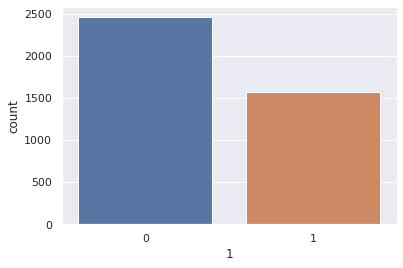

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="1", data=zp)

plt.figure(dpi= 80)
sns.pairplot(zp[['0', '0_64', '0_64_1', '0_1', '0_32', '0_2', '0_3', '0_4', '0_5', '0_6',
       '0_7', '0_64_2', '0_8', '0_9', '0_10', '0_32_1', '0_11', '1_29', '1_93',
       '0_12', '0_96', '0_13', '0_14', '0_15', '0_16', '0_17', '0_18', '0_19',
       '0_20', '0_21', '0_22', '0_23', '0_24', '0_25', '0_26', '0_27', '0_28',
       '0_29', '0_30', '0_31', '0_32_2', '0_33', '0_34', '0_35', '0_36',
       '0_37', '0_38', '0_39', '0_40', '0_41', '0_42', '0_778', '0_43', '0_44',
       '3_756', '61', '278', '1']], kind="scatter", hue="1", 
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

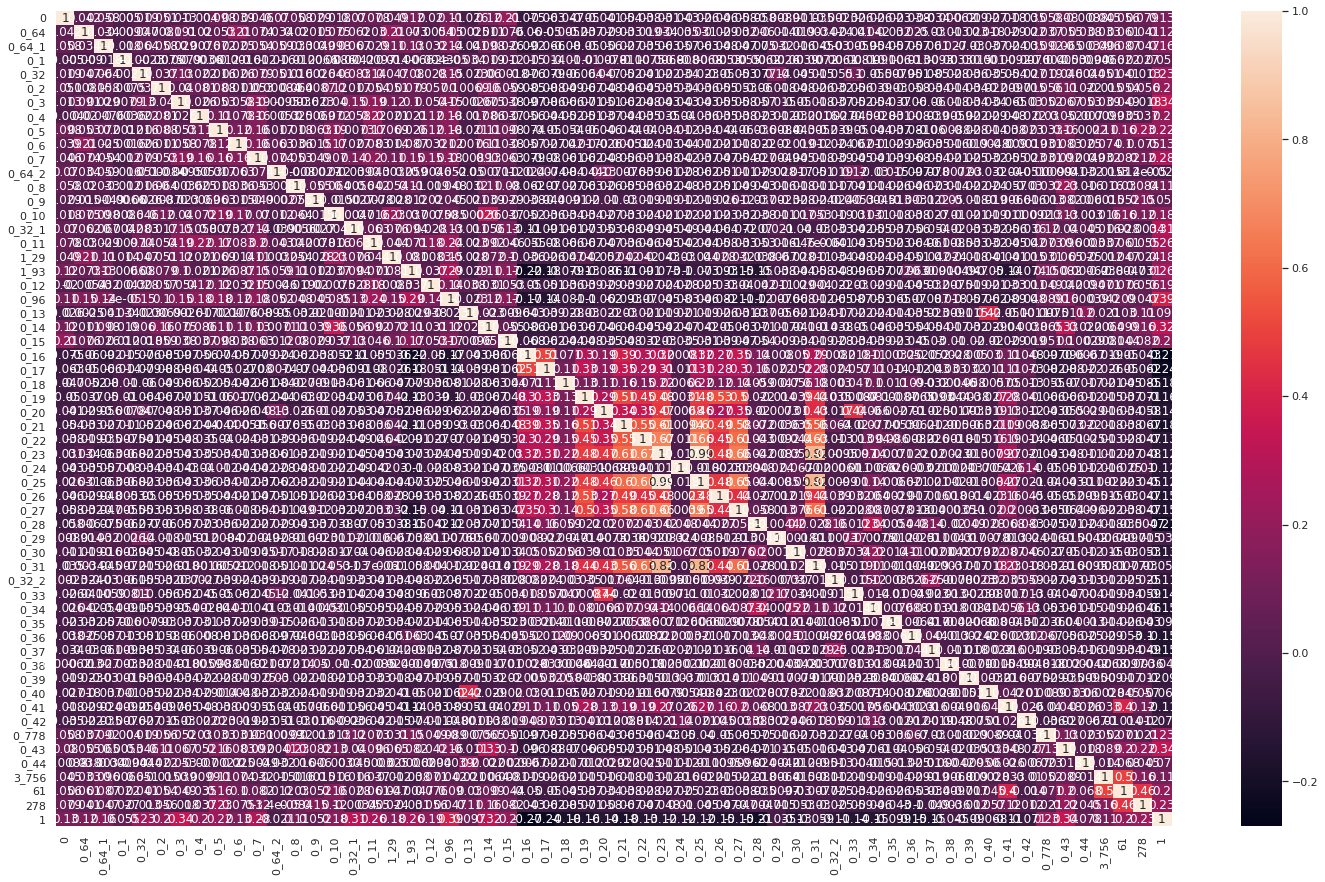

In [ ]:
#Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(zp.corr(), annot=True)

In [ ]:

#Defining the predictor variables and target variables in our dataset.
X = zp.drop(['1'],axis=1)
y = zp['1']
#One hot encoding our data for the categorical variables
#X = pd.get_dummies(X, drop_first=True)
#Splitting our dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
#Importing the Logistic Regression and the StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Fitting the data in a logistic regression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
#Predicting classification using the test set
y_predict = regressor.predict(X_test)
#Getting the metrics for assessing our baseline model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[454  22]
 [ 53 277]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       476
           1       0.93      0.84      0.88       330

    accuracy                           0.91       806
   macro avg       0.91      0.90      0.90       806
weighted avg       0.91      0.91      0.91       806



# Naive Bayes

## Naive Bayes with Unscaled data

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = zp.drop(['1'],axis=1)
y = zp['1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
#Predicting using the test values
y_predict = model.predict(X_test)
#Printing out the various metrics
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8287841191066998
[[378 131]
 [  7 290]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       509
           1       0.69      0.98      0.81       297

    accuracy                           0.83       806
   macro avg       0.84      0.86      0.83       806
weighted avg       0.87      0.83      0.83       806



In [ ]:
X = zp.drop(['1'],axis=1)
y = zp['1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
#Predicting using the test values
y_predict = model.predict(X_test)
#Printing out the various metrics
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.8362282878411911
[[567 179]
 [ 19 444]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       746
           1       0.71      0.96      0.82       463

    accuracy                           0.84      1209
   macro avg       0.84      0.86      0.83      1209
weighted avg       0.87      0.84      0.84      1209



In [ ]:
X = zp.drop(['1'],axis=1)
y = zp['1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
#Predicting using the test values
y_predict = model.predict(X_test)
#Printing out the various metrics
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8356079404466501
[[725 237]
 [ 28 622]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       962
           1       0.72      0.96      0.82       650

    accuracy                           0.84      1612
   macro avg       0.84      0.86      0.83      1612
weighted avg       0.87      0.84      0.84      1612



## Scaled data

In [ ]:
X = zp.drop(['1'],axis=1)
y = zp['1']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,test_size=0.2)
#Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Importing the Gaussian Naive BayesClassifier
from sklearn.naive_bayes import GaussianNB
#Fitting the data into our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)
#Predicting using the test values
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
predicted = model.predict(X_test)
print("Scaled Data Mean:", np.mean(predicted == y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Scaled Data Mean: 0.6129032258064516
[[493   0]
 [312   1]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       493
           1       1.00      0.00      0.01       313

    accuracy                           0.61       806
   macro avg       0.81      0.50      0.38       806
weighted avg       0.76      0.61      0.47       806



In [ ]:
X = zp.drop(['1'],axis=1)
y = zp['1']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,test_size=0.3)
#Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Importing the Gaussian Naive BayesClassifier
from sklearn.naive_bayes import GaussianNB
#Fitting the data into our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)
#Predicting using the test values
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
predicted = model.predict(X_test)
print("Scaled Data Mean:", np.mean(predicted == y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Scaled Data Mean: 0.6203473945409429
[[741   1]
 [458   9]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       742
           1       0.90      0.02      0.04       467

    accuracy                           0.62      1209
   macro avg       0.76      0.51      0.40      1209
weighted avg       0.73      0.62      0.48      1209



In [ ]:
X = zp.drop(['1'],axis=1)
y = zp['1']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,test_size=0.4)
#Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Importing the Gaussian Naive BayesClassifier
from sklearn.naive_bayes import GaussianNB
#Fitting the data into our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)
#Predicting using the test values
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
predicted = model.predict(X_test)
print("Scaled Data Mean:", np.mean(predicted == y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Scaled Data Mean: 0.6129032258064516
[[987   0]
 [624   1]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       987
           1       1.00      0.00      0.00       625

    accuracy                           0.61      1612
   macro avg       0.81      0.50      0.38      1612
weighted avg       0.76      0.61      0.47      1612



* The scaled model performed worse of compared to the unscaled data.
* Lets have a look at how XGBoost models will perform

## Challenging the solution

In [ ]:
#importing xgboost and decomposition
#
import xgboost as xgb
from sklearn import decomposition
from sklearn import metrics
#Defining the regression of our classifer to linear
xgb_model = xgb.XGBClassifier(objective='reg:linear',random_state=42)

X = zp.drop(['1'],axis=1)
y = zp['1']
# Therefore we need to reduce the feature by applying a reduction algorithm.
# Applying the reduction algorithm: PCA
pca = decomposition.PCA(n_components=5).fit(X)
X = pca.transform(X)
X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

xgb_model.fit(X_train,y_train)

[07:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Predict the data using the test set
y_predict = xgb_model.predict(X_test)
#Getting the metrics for my assessments of my model
print('ZP Accuracy', metrics.accuracy_score(y_test,y_predict))
print('ZP All Columns RMSE is', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

ZP Accuracy 0.8548387096774194
ZP All Columns RMSE is 0.3810003810005715


In [ ]:
#Defining the regression of our classifer to linear
xgb_model = xgb.XGBClassifier(objective='reg:linear',random_state=42)

X = zp.drop(['1'],axis=1)
y = zp['1']
# Therefore we need to reduce the feature by applying a reduction algorithm.
# Applying the reduction algorithm: PCA
pca = decomposition.PCA(n_components=5).fit(X)
X = pca.transform(X)
X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

xgb_model.fit(X_train,y_train)

[07:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Predict the data using the test set
y_predict = xgb_model.predict(X_test)
#Getting the metrics for my assessments of my model
print('ZP Accuracy', metrics.accuracy_score(y_test,y_predict))
print('ZP All Columns RMSE is', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

ZP Accuracy 0.858560794044665
ZP All Columns RMSE is 0.3760840410803614


In [ ]:
#Defining the regression of our classifer to linear
xgb_model = xgb.XGBClassifier(objective='reg:linear',random_state=42)

X = zp.drop(['1'],axis=1)
y = zp['1']
# Therefore we need to reduce the feature by applying a reduction algorithm.
# Applying the reduction algorithm: PCA
pca = decomposition.PCA(n_components=5).fit(X)
X = pca.transform(X)
X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

xgb_model.fit(X_train,y_train)

[07:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Predict the data using the test set
y_predict = xgb_model.predict(X_test)
#Getting the metrics for my assessments of my model
print('ZP Accuracy', metrics.accuracy_score(y_test,y_predict))
print('ZP All Columns RMSE is', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

ZP Accuracy 0.8566997518610422
ZP All Columns RMSE is 0.3785501923641802


# Conclusion

* The Unscaled data
-- The accuracy score for the 80-20 set is 82.87%
-- The accuracy for the 70-30 set is 83.62%
-- While the accuracy score for the 60-40 model is 83.56%
* the 70-30 set model performed better off compared to any other model


* The scaled data
-- The accuracy score for the 80-20 model is 61.29%
-- The accuracy score for the 70-30 nmodel is 62.03%
-- While the accuracy score for the 60-40 model is 61.29%
* The scaled data performed worse off compared to the unscaled data set
* The 80-20 and 60-40 model had the same  accuracy score of 61.29%
* Still the 70-30 model performed better compared to any other set

* For the XGBoost model,
-- The 80-20 accuracy score is 85.48%
-- The accuracy score for the 70-30 set is 85.86%
-- While the accuracy score for the 60-40 set is 85.67%
* The XGBoost model performed better compared to any other model, better than the scaled and unscaled models
* The 70-30 model seems to perform the best pove rthe three methods hence the best train and test size parameter.
